# Carlos López Muñoz

# Nota :
El modelo funciona, pero ha sido entrenado solo con una epoca, es por eso que las imagenes que me generan son tan malas. ☣️☣️

Se debe implementar una GAN para crear imágenes de prendas y accesorios.

El dataset recomendado para entrenar la GAN es el "Fashion MNIST".

La entrega de la tarea consiste en un enlace un repositorio de GitHub en el que deben estar incluidos los siguientes recursos:

Descripción del problema en el archivo README.md
Cuaderno jupyter con el código. Puede ser un archivo, un enlace a un cuaderno compartido en Colab o ambas cosas.
Archivos de los modelos, tanto para el generador como para el discriminador.
Una muestra de las imágenes generadas.

<img src="https://shop.iturri.com/7594-large_default/camisa-laboral-mujer-de-manga-larga-70-algodon-30-poliester-celeste.jpg" height="100px" wheight="100px" >

In [3]:
# Importación de las librerias.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
# Cargamos el dataset.
prendas = tf.keras.datasets.fashion_mnist

In [5]:
# Comprobamos de que el dataset se ha cargado correctamente.
(X_train_full, y_train_full), (X_test, y_test) = prendas.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Nos quedamos solo con las imganes.
X_train_full = X_train_full.reshape(X_train_full.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# Unimos X_Train_full y X_test para tener todos los valores
prendas_total = np.concatenate((X_train_full, X_test), axis=0)

In [8]:
print(f"Total de prendas: {len(prendas_total)}")

Total de prendas: 70000


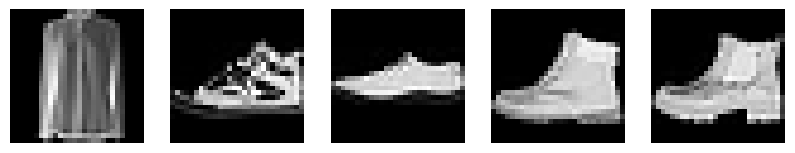

In [9]:
# Muestra de carga correcta de 5 imagenes ramdon.
prenda_R = np.random.randint(prendas_total.shape[0], size=5)

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(prendas_total[prenda_R[i]], cmap='gray')
    plt.axis('off')
plt.show()

In [10]:
# Convierte las imágenes a un array de numpy y prepara el dataset de TensorFlow
# Parámetros del dataset y del modelo
BATCH_SIZE = 32 # Probar más adelante con 64, 128 o más
NUMBER_OF_IMAGES = 5000
# Normalizamos las imagenes
prendas_total = prendas_total / 127.5 - 1.0
prendas_array = np.array(prendas_total)
dataset = tf.data.Dataset.from_tensor_slices(prendas_array).shuffle(NUMBER_OF_IMAGES).batch(BATCH_SIZE)
print(f"Dataset procesado: {NUMBER_OF_IMAGES} imágenes cargadas y preparadas.")

Dataset procesado: 5000 imágenes cargadas y preparadas.


In [11]:
# Verifica la estructura del dataset
for batch in dataset.take(1): # Toma un lote
  print("Dimensiones del lote:", batch.shape)
  print("Rango: de", batch.numpy().min(), "a", batch.numpy().max())

Dimensiones del lote: (32, 28, 28, 1)
Rango: de -1.0 a 1.0


In [12]:
# Define el generador
LATENT_DIM = 100

generator = keras.Sequential([
    # Capa densa inicial
    layers.Dense(7 * 7 * 128, input_shape=(LATENT_DIM,), use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    # Redimensionar a (7, 7, 128)
    layers.Reshape((7, 7, 128)),

    # Primera capa de convolución transpuesta
    layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    # Segunda capa de convolución transpuesta
    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.LeakyReLU(),

    # Capa final de convolución transpuesta
    layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding="same", activation='tanh')
])

c:\Users\Carlos\Desktop\entrenamiento\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Dimensiones de cada capa
noise = tf.random.normal([1, LATENT_DIM])
x = noise
for layer in generator.layers:
  x = layer(x)
  print(f"{layer.name}: {x.shape}")

dense: (1, 6272)
batch_normalization: (1, 6272)
leaky_re_lu: (1, 6272)
reshape: (1, 7, 7, 128)
conv2d_transpose: (1, 7, 7, 128)
batch_normalization_1: (1, 7, 7, 128)
leaky_re_lu_1: (1, 7, 7, 128)
conv2d_transpose_1: (1, 14, 14, 64)
batch_normalization_2: (1, 14, 14, 64)
leaky_re_lu_2: (1, 14, 14, 64)
conv2d_transpose_2: (1, 28, 28, 1)


In [14]:
generated_image = generator(noise, training=False)
print("Dimensiones de la imagen generada:", generated_image.shape)

Dimensiones de la imagen generada: (1, 28, 28, 1)


Dimensiones de la imagen generada: (1, 28, 28, 1)
Rango de valores de la imagen generada: de -0.11183275 a 0.069148675


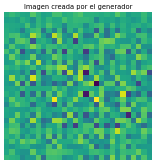

In [15]:
# Comprueba que el generador está funcionando correctamente

# Genera un vector latente aleatorio (ruido)
noise = tf.random.normal([1, LATENT_DIM])

# Genera una imagen utilizando el generador
generated_image = generator(noise, training=False)

# Muestra las dimensiones de la imagen generada
print("Dimensiones de la imagen generada:", generated_image.shape)

# Verifica el rango de valores de la imagen generada
print("Rango de valores de la imagen generada: de", generated_image.numpy().min(), "a", generated_image.numpy().max())

# Muestra la imagen generada
plt.figure(dpi=40)
plt.imshow((generated_image[0] + 1) / 2) # Reescala la imagen al rango [0, 1] para visualizarla
plt.axis("off")
plt.title("Imagen creada por el generador")
plt.show()

In [16]:
# Define el discriminador
discriminator = keras.Sequential([
    # Capa de entrada de convolución
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding="same", input_shape=(28, 28, 1)),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    # Segunda capa de convolución
    layers.Conv2D(128, (5, 5), strides=(2, 2), padding="same"),
    layers.LeakyReLU(),
    layers.Dropout(0.3),

    # Aplanar y capa densa final
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\Carlos\Desktop\entrenamiento\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Muestra el resumen del modelo
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Prueba el discriminador con una imagen creada por el generador
generated_image = generator(noise, training=False)

# Pasa la imagen por el discriminador
decision = discriminator(generated_image)
print("Decisión del discriminador (valor cercano a 0 = falsa, 1 = real):", decision.numpy())

Decisión del discriminador (valor cercano a 0 = falsa, 1 = real): [[0.49995103]]


In [19]:
# Inspecciona un lote del dataset
for batch in dataset.take(1):
    print("Dimensiones del lote:", batch.shape)
    break

Dimensiones del lote: (32, 28, 28, 1)


In [20]:
# Parámetros del entrenamiento
EPOCHS = 30

In [21]:
# Inicializa los optimizadores y la función de pérdida
cross_entropy = keras.losses.BinaryCrossentropy(from_logits=False)  # No se necesita logits porque la última capa era una sigmoide
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

Época 1/30
Pérdida del discriminador: 1.3924050331115723, Pérdida del generador: 0.7297306060791016
Pérdida del discriminador: 1.3636362552642822, Pérdida del generador: 0.7150843143463135
Pérdida del discriminador: 1.33819580078125, Pérdida del generador: 0.7086222171783447
Pérdida del discriminador: 1.3203320503234863, Pérdida del generador: 0.697579026222229
Pérdida del discriminador: 1.2956078052520752, Pérdida del generador: 0.6889632344245911
Pérdida del discriminador: 1.292548418045044, Pérdida del generador: 0.6820561289787292
Pérdida del discriminador: 1.2814358472824097, Pérdida del generador: 0.6760905981063843
Pérdida del discriminador: 1.251549482345581, Pérdida del generador: 0.6707106828689575
Pérdida del discriminador: 1.2385551929473877, Pérdida del generador: 0.6695970296859741
Pérdida del discriminador: 1.2106502056121826, Pérdida del generador: 0.6656293869018555
Pérdida del discriminador: 1.22123122215271, Pérdida del generador: 0.6623807549476624
Pérdida del discr

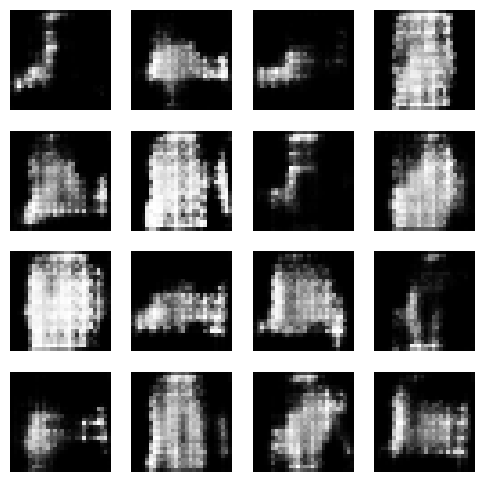

Época 3/30
Pérdida del discriminador: 1.1067200899124146, Pérdida del generador: 0.9810932874679565
Pérdida del discriminador: 0.9840972423553467, Pérdida del generador: 0.909839391708374
Pérdida del discriminador: 1.0497150421142578, Pérdida del generador: 0.9984757900238037
Pérdida del discriminador: 1.0441794395446777, Pérdida del generador: 1.064449667930603
Pérdida del discriminador: 1.2026835680007935, Pérdida del generador: 1.1647974252700806
Pérdida del discriminador: 1.0200867652893066, Pérdida del generador: 1.2137088775634766
Pérdida del discriminador: 0.9876525402069092, Pérdida del generador: 1.160471796989441
Pérdida del discriminador: 1.249968409538269, Pérdida del generador: 1.097943902015686
Pérdida del discriminador: 1.0569653511047363, Pérdida del generador: 1.008579969406128
Pérdida del discriminador: 1.0366227626800537, Pérdida del generador: 0.9984874129295349
Pérdida del discriminador: 1.0555248260498047, Pérdida del generador: 0.9733543395996094
Pérdida del disc

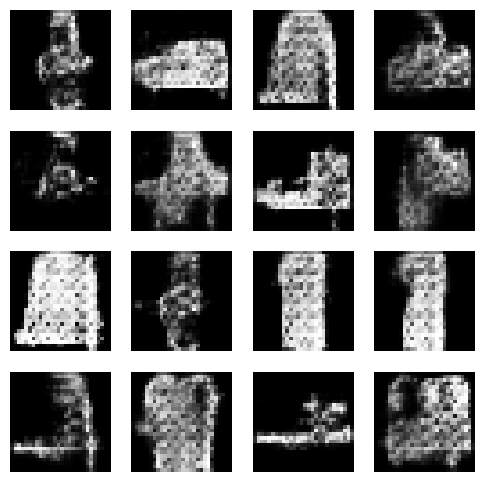

Época 5/30
Pérdida del discriminador: 0.9436730146408081, Pérdida del generador: 1.6424517631530762
Pérdida del discriminador: 0.7864797115325928, Pérdida del generador: 1.4858548641204834
Pérdida del discriminador: 0.9095197319984436, Pérdida del generador: 1.519993782043457
Pérdida del discriminador: 0.8621276021003723, Pérdida del generador: 1.537584900856018
Pérdida del discriminador: 1.101989984512329, Pérdida del generador: 1.5008413791656494
Pérdida del discriminador: 1.0151227712631226, Pérdida del generador: 1.4583544731140137
Pérdida del discriminador: 0.8681619167327881, Pérdida del generador: 1.556506872177124
Pérdida del discriminador: 0.9552891850471497, Pérdida del generador: 1.5705825090408325
Pérdida del discriminador: 0.7681206464767456, Pérdida del generador: 1.501713752746582
Pérdida del discriminador: 1.0130796432495117, Pérdida del generador: 1.4357993602752686
Pérdida del discriminador: 0.8665928840637207, Pérdida del generador: 1.5773943662643433
Pérdida del dis

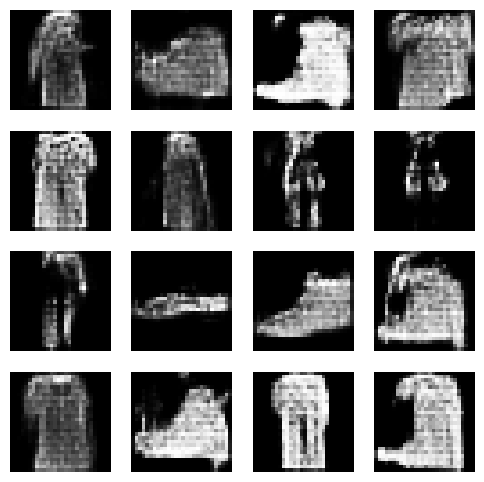

Época 7/30
Pérdida del discriminador: 1.1017050743103027, Pérdida del generador: 1.2029184103012085
Pérdida del discriminador: 1.166500449180603, Pérdida del generador: 1.1337682008743286
Pérdida del discriminador: 1.0894219875335693, Pérdida del generador: 1.1641162633895874
Pérdida del discriminador: 1.1114920377731323, Pérdida del generador: 0.9234709143638611
Pérdida del discriminador: 0.97902512550354, Pérdida del generador: 1.1195385456085205
Pérdida del discriminador: 1.0608220100402832, Pérdida del generador: 1.1669201850891113
Pérdida del discriminador: 0.8864127397537231, Pérdida del generador: 1.2692604064941406
Pérdida del discriminador: 1.1336915493011475, Pérdida del generador: 1.4982941150665283
Pérdida del discriminador: 1.0870351791381836, Pérdida del generador: 1.5682332515716553
Pérdida del discriminador: 0.962753415107727, Pérdida del generador: 1.5597493648529053
Pérdida del discriminador: 0.8909271955490112, Pérdida del generador: 1.5298724174499512
Pérdida del di

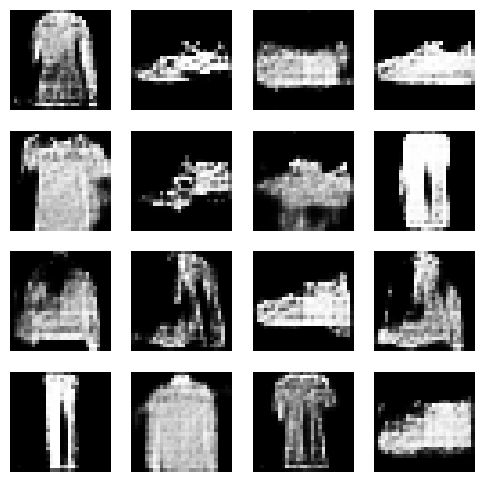

Época 9/30
Pérdida del discriminador: 1.2258832454681396, Pérdida del generador: 1.288508415222168
Pérdida del discriminador: 1.1689677238464355, Pérdida del generador: 1.1390299797058105
Pérdida del discriminador: 1.3009164333343506, Pérdida del generador: 1.1717982292175293
Pérdida del discriminador: 1.2462302446365356, Pérdida del generador: 1.1122246980667114
Pérdida del discriminador: 1.13297700881958, Pérdida del generador: 0.9952098727226257
Pérdida del discriminador: 1.104743480682373, Pérdida del generador: 1.0830574035644531
Pérdida del discriminador: 1.0901424884796143, Pérdida del generador: 1.0155706405639648
Pérdida del discriminador: 0.9360546469688416, Pérdida del generador: 1.1467132568359375
Pérdida del discriminador: 0.9616380929946899, Pérdida del generador: 1.0124614238739014
Pérdida del discriminador: 1.10454523563385, Pérdida del generador: 0.9013388156890869
Pérdida del discriminador: 1.1217111349105835, Pérdida del generador: 1.1068590879440308
Pérdida del disc

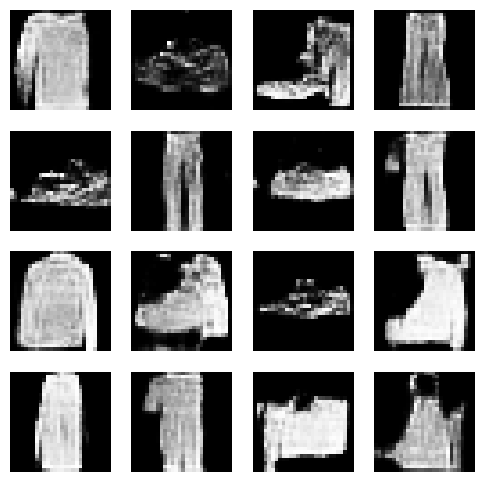

Época 11/30
Pérdida del discriminador: 1.310092568397522, Pérdida del generador: 1.087108850479126
Pérdida del discriminador: 1.1865040063858032, Pérdida del generador: 0.9590167999267578
Pérdida del discriminador: 1.247282862663269, Pérdida del generador: 1.0388063192367554
Pérdida del discriminador: 1.083993673324585, Pérdida del generador: 1.0295840501785278
Pérdida del discriminador: 1.249598503112793, Pérdida del generador: 1.0503711700439453
Pérdida del discriminador: 1.252110242843628, Pérdida del generador: 1.012458324432373
Pérdida del discriminador: 1.2289185523986816, Pérdida del generador: 0.9531974792480469
Pérdida del discriminador: 1.032637119293213, Pérdida del generador: 0.9801561236381531
Pérdida del discriminador: 1.2702233791351318, Pérdida del generador: 1.0135722160339355
Pérdida del discriminador: 1.2423688173294067, Pérdida del generador: 1.0061625242233276
Pérdida del discriminador: 1.0770792961120605, Pérdida del generador: 1.1597778797149658
Pérdida del discr

KeyboardInterrupt: 

In [22]:
# Entrenamiento de la GAN
for epoch in range(EPOCHS):
    print(f"Época {epoch + 1}/{EPOCHS}")

    for real_images in dataset:
        # Obtiene el tamaño del lote actual
        current_batch_size = real_images.shape[0]

        # Genera ruido aleatorio para crear imágenes falsas
        noise = tf.random.normal([current_batch_size, LATENT_DIM])

        # Crea imágenes falsas con el generador
        generated_images = generator(noise, training=True)

        # Etiquetas realies y falsas
        real_labels = tf.ones((current_batch_size, 1)) # Imágenes reales (etiqueta = 1)
        fake_labels = tf.zeros((current_batch_size, 1)) # Imágenes generadas (etiqueta = 0)

        # Entrena el discriminador
        with tf.GradientTape() as disc_tape: # Crea un contexto de gradiente para calcular la pérdida del discriminador.
            # Obtiene las predicciones del discriminador para las imágenes reales
            real_output = discriminator(real_images, training=True)
            # Obtiene las predicciones del discriminador para las imágenes falsas/generadas.
            fake_output = discriminator(generated_images, training=True)
            # Calcula la pérdida del discriminador para las imágenes reales.
            disc_loss_real = cross_entropy(real_labels, real_output)
            # Calcula la pérdida del discriminador para las imágenes generadas (fake).
            disc_loss_fake = cross_entropy(fake_labels, fake_output)
            # Suma ambas pérdidas para obtener la pérdida todal del discriminador.
            disc_loss = disc_loss_real + disc_loss_fake

        # Calcula los gradientes de la pérdida con respecto a las variables entrenables del discriminador
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        # Aplica los gradientes para actualizar los pesos del discriminador.
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # Genera ruido nuevamente para entrenar el generador
        noise = tf.random.normal([current_batch_size, LATENT_DIM])

        # Entrena el generador
        with tf.GradientTape() as gen_tape: # Crea un contexto de gradiente para calcular la pérdida del generador.
            # Crea imágenes falsas con el generador
            generated_images = generator(noise, training=True)
            # Evalúa las imágenes generadas con el discriminador (sin actualizar los pesos).
            fake_output = discriminator(generated_images, training=False)
            # Calcula la pérdida del generador intentando "engañar" al discriminador.
            gen_loss = cross_entropy(real_labels, fake_output)

        # Calcula los gradientes de la pérdida con respecto a las variables entrenables del generador.
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        # Aplica los gradientes para actualizar los pesos del generador.
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

        # Muestra la pérdida de cada red neuronal
        print(f"Pérdida del discriminador: {disc_loss.numpy()}, Pérdida del generador: {gen_loss.numpy()}")

    # Guarda la GAN en ficheros
    # Graba en disco los modelos
    generator.save(f"generador_caras_{epoch + 1}ep_1000img.keras")
    discriminator.save(f"discriminador_caras_{epoch + 1}ep_1000img.keras")


    # Muestra el progreso cada 2 épocas
    if (epoch + 1) % 2 == 0 or epoch == EPOCHS - 1:
        # Genera y muestra imágenes de ejemplo
        noise = tf.random.normal([16, LATENT_DIM])
        generated_images = generator(noise, training=False)
        generated_images = (generated_images + 1) / 2 # Reescala de [-1, 1] a [0, 1]

        fig, axes = plt.subplots(4, 4, figsize=(6, 6))
        for img, ax in zip(generated_images, axes.flatten()):
            ax.imshow(img, cmap='gray')
            ax.axis("off")
        plt.show()